In [1]:
import itertools


def divide_list(lst, n):
    return [list(i) for i in itertools.zip_longest(*[iter(lst)]*n, fillvalue=None)]

def algo_euclide(a, b):
    if b == 0:
        return a

    else:
        return algo_euclide(b, a % b)

def test_premier(n):
    t=0
    for i in range(2,n):
        if n%i == 0 :
            return False
    return True    
        
    
        


def est_premier(a,b):
    if(algo_euclide(a,b)==1):
        return True
    else:
        return False

def indicatrice_euler(n):
    indicatrice = 0
    i=1
    for i in range(n):
        if algo_euclide(i,n) == 1:
            indicatrice+=1

    print("indic :",indicatrice)


def inverse_mod(n,mod):
    for i in range(mod):        
        if((i*n)%mod ==1):
            return i

def ordre(a,n):
    for i in range(1,n):
        if((a**i)%n==1):
            return i


def test_shor(n):
    lfacteur = []
    for a in range(2,n):
        r=ordre(a,n)
        if(est_premier(a,n)):
            lfacteur.append(algo_euclide((a**(r/2))-1,n))
            lfacteur.append(algo_euclide((a**(r/2))+1,n))
            #print("d : ",algo_euclide((a**(r/2))-1,n),"  d' : ",algo_euclide((a**(r/2))+1,n))
    


    lfacteur = list(set(lfacteur))

    #del lfacteur[-1]
    
    lfacteur = [x for x in lfacteur if x > 1]
    
    lfacteur.remove(n)
    if not(lfacteur):
        print(n," est un nombre premier")
    else :            
        
        print("Les facteurs sont : ",lfacteur)            

      

def echant(n,e):
    l=[]
    echantillon=[]
    for i in range(0,n):
            if test_premier(i) != False:
                l.append(i)
    print("Il y a",len(l),"nombres premiers de 0 à",n)
    #d_list = divide_list(l,5)
    #print(d_list)
    return l

def echant_modif(n):
    l=[]
    echantillon=[]
    for i in range(0,n):
            if test_premier(i) != False:
                l.append(i)
                echantillon.append(i)
            else :
                l.append(0)
    print("Il y a",len(echantillon),"nombres premiers de 0 à",n)
    return l


def echant_p(a,b):
    l=[]
    echantillon=[]
    for i in range(a,b):
            if test_premier(i) != False:
                l.append(i)
    #print("Il y a",len(l),"nombres premiers de",a,"à",b,"un pourcentage de",(len(l)/(b-a))*100)
    return (len(l)/(b-a))*100
    #d_list = divide_list(l,5)
    #print(d_list)
 



Il y a 64 nombres premiers de 0 à 300
300 300


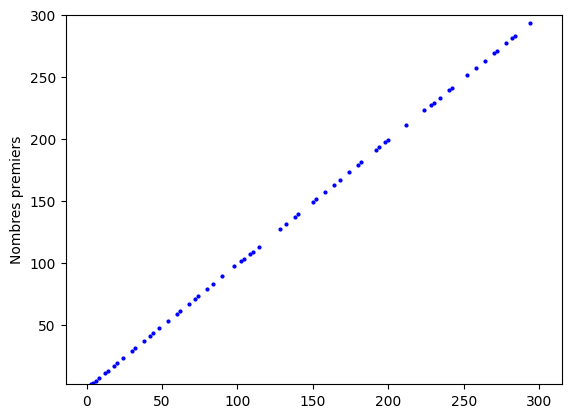

In [2]:
import matplotlib.pyplot as plt
N = 300
#taille = len(echant(N,2))
xlabel = list(range(1, N+1))
ylabel = echant_modif(N)
print(len(xlabel),len(ylabel))
plt.plot(xlabel,ylabel,'bo',markersize = 2)
plt.ylim([2,N])
plt.ylabel('Nombres premiers')
plt.show()

In [3]:
a =echant_p(1,100)
print("{:.2f}".format(a))

26.26


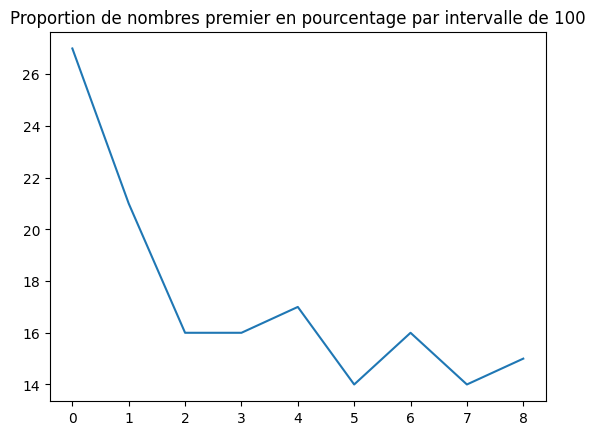

In [4]:
def proportion_premier(n):
    a=0
    b=100
    x=[]
    while b<n:
        x.append(echant_p(a,b))
        a+=100
        b+=100
    return x

p_premier =proportion_premier(1000)
plt.plot(p_premier,markersize = 2)
plt.title("Proportion de nombres premier en pourcentage par intervalle de 100")


plt.show()

In [5]:
print('pourcentage max:',max(p_premier))
print('pourcentage min:',min(p_premier))
print(p_premier.index(max(p_premier)))
print(p_premier.index(min(p_premier)))


pourcentage max: 27.0
pourcentage min: 14.000000000000002
0
5


Evaluation de la performance de la fonction proportion_premier

Temps d'execution max: 0.3319997787475586 s
Nombre d'itération sur la fct : 99


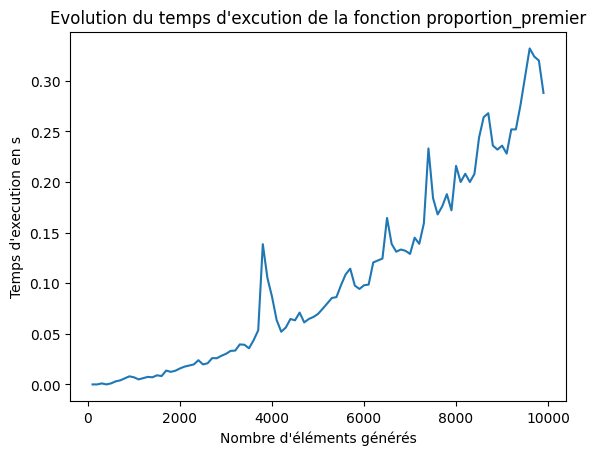

In [6]:
import time
limite = 10000
pas = 100

def evaluation(limite,pas) :
    temps_exec = []
    for i in range(100,limite,pas):
        start_time = time.time()
        proportion_premier(i)
        temps_exec.append(time.time()-start_time)

    return temps_exec

y = list(range(100,limite,pas))
x_eval =evaluation(limite,pas)

plt.plot(y,x_eval,markersize = 3)
plt.title("Evolution du temps d'excution de la fonction proportion_premier")
plt.ylabel("Temps d'execution en s")
plt.xlabel("Nombre d'éléments générés")


print("Temps d'execution max:",max(x_eval),"s")
print("Nombre d'itération sur la fct :",len(x_eval))


Regression polynomiale

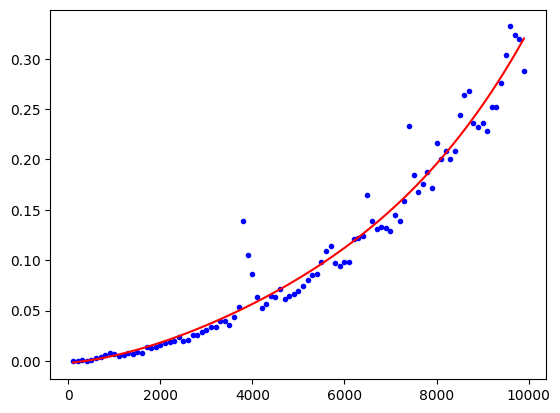

Temps moyen d'execution : 0.10591848450477677
Erreur quadratique moyenne : 0.3003290616344366 ms


In [7]:
import numpy


coefficients = numpy.polyfit(y,x_eval,deg =4)

polynomial = numpy.poly1d(coefficients)

plt.plot(y,x_eval,'bo',markersize=3)
plt.plot(y,polynomial(y),'r')

plt.show()
y_pred = polynomial(y)
mse = numpy.mean((y_pred - x_eval)**2)
print("Temps moyen d'execution :",numpy.mean(x_eval))
print("Erreur quadratique moyenne :",mse*1000,"ms")

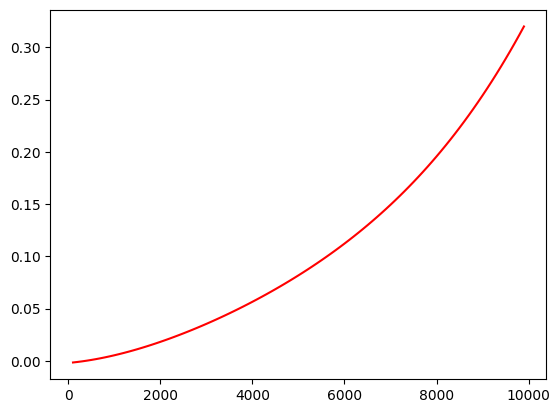

In [8]:
plt.plot(y,polynomial(y),'r')


plt.show()

Etude sur les performances de différents algorithmes pour déterminer si un nombre est premier

Génération d'une liste de ... entiers entre ... et ... pour évaluer les différents algorithmes :

In [33]:
import random
# On génère une liste de 1 000 000 d'entiers aléatoires
alea = [random.randint(1,1000) for i in range (1000)]




Algorithme parcourant tous les diviseurs possibles (voir fct test_premier) :


In [34]:
def eval_test_premier(n):
    exec_time = []
    start_time = time.time()
    for a in n:
        test_premier(a)
     
    exec_time.append(time.time()-start_time)
    return exec_time

In [35]:
y_simple = eval_test_premier(alea)
y_simple

[0.004037141799926758]

Test de primalité de Fermat

In [12]:
def test_fermat(n):
    if(2**(n-1))%n==1:
        return True
    else:

        return False

In [13]:
print(test_fermat(18))
print(test_premier(18))

False
False


Etude des nombres pseudo-premiers faussant le test de primalité de Fermat

In [14]:
def erreur_fermat(l):
    resul =[]
    i=0
    for x in l :
        if test_fermat(x) != test_premier(x):
            
           # print("Erreur",x)
            resul.append(x)
            i+=1
    return resul   
    #return resul        
    #return (len(resul)/len(l))*100
    # print("Nombres pseudo-premiers de base 2 dans l'intervalle :",i,"\nProportion :",(i/len(l))*100,"%")        
            

In [15]:
print(erreur_fermat(list(range(1,20000))))

[1, 2, 341, 561, 645, 1105, 1387, 1729, 1905, 2047, 2465, 2701, 2821, 3277, 4033, 4369, 4371, 4681, 5461, 6601, 7957, 8321, 8481, 8911, 10261, 10585, 11305, 12801, 13741, 13747, 13981, 14491, 15709, 15841, 16705, 18705, 18721, 19951]


In [16]:
limitf = 30000
a = 2
b=1000
resultf =[]
while b < limitf :
    l =  list(range(a,b))
    resultf.append(erreur_fermat(l))
    a+=1000
    b+=1000




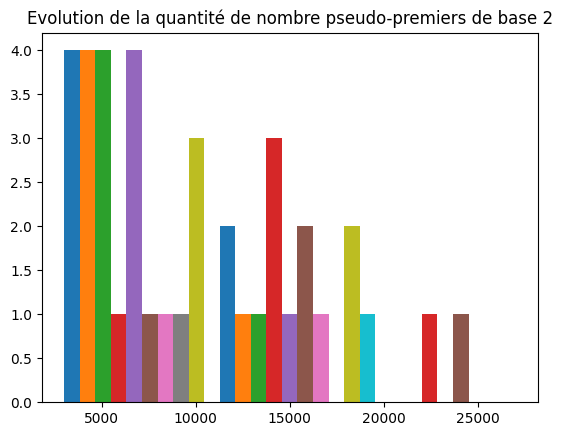

In [17]:


plt.hist(resultf, range = (0, limitf), bins = 1)
plt.title("Evolution de la quantité de nombre pseudo-premiers de base 2")
plt.show()

In [36]:
def eval_fermat(n):
    exec_time = []
    start_time = time.time()
    for a in n:
        test_fermat(a)
     
    exec_time.append(time.time()-start_time)
    return exec_time

In [37]:
y_fermat = eval_fermat(alea)
y_fermat

[0.0]

In [20]:
(y_simple[0]/y_fermat[0])*100

546.7586612376509

Test de primarité de Miller-Rabin

In [21]:
import random
def miller_rabin(n,k):

    if n == 2 or n ==3:
        return True
    if n % 2 ==0 :
        return False
    r,s = 0, n-1
    while s%2 == 0:
        r+=1
        s //= 2
    for i in range(k):
        a = random.randrange(2,n-1)
        x = pow(a,s,n)
        if x==1 or x == n-1 :
            continue
        for j in range(r-1):
            x = pow(x,2,n)
            if x == n-1:
                break

        else:
            return False
        
    return True

In [25]:
miller_rabin(71,400)

True

In [26]:
def erreur_miller(l):
    resul =[]
    i=0
    for x in l :
        if miller_rabin(x,100) != test_premier(x):
            
            print("Erreur",x)
            resul.append(x)
            i+=1
    return resul   
    #return resul        
    #return (len(resul)/len(l))*100
    # print("Nombres pseudo-premiers de base 2 dans l'intervalle :",i,"\nProportion :",(i/len(l))*100,"%")        
            

In [28]:
print(erreur_miller(list(range(1,100))))

KeyboardInterrupt: 

In [31]:
def eval_miller(n):
    exec_time = []
    start_time = time.time()
    for a in n:
        miller_rabin(a,5)
     
    exec_time.append(time.time()-start_time)
    return exec_time

In [38]:
print(eval_miller(alea))

KeyboardInterrupt: 